In [56]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt

In [57]:
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [58]:
X_test.shape

(10000, 32, 32, 3)

In [59]:
y_train[:5] #Since this is an 2d array what we need is just the values 6 or 9 which are actually index so we need to reshape this array or y_train

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [60]:
#Reshaping y_train
y_train = y_train.reshape(-1 , )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [61]:
classes = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

In [62]:
def plot_sample(X , y , index):
  plt.figure(figsize = (15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])

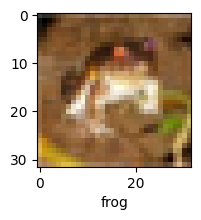

In [63]:
plot_sample(X_train , y_train , 0)

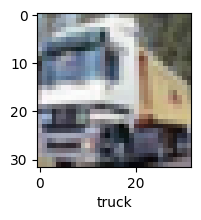

In [64]:
plot_sample(X_train , y_train , 1)

In [65]:
#Normalizing our data we need to divide each pixel value by 255 to make it in 0 to 1 range
X_train = X_train / 255
X_test = X_test / 255

In [66]:
#Building first a simple ANN
ann = models.Sequential([
                         layers.Flatten(input_shape = (32,32 ,3)) ,
                         layers.Dense(3000 , activation = 'relu') ,
                          layers.Dense(1000 , activation = 'relu') ,
                         layers.Dense(10 , activation = 'sigmoid') ,
])

ann.compile(optimizer = 'SGD' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

ann.fit(X_train , y_train , epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 146s 93ms/step - loss: 1.8148 - accuracy: 0.3520
Epoch 2/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.6263 - accuracy: 0.4249
Epoch 3/5
1563/1563 [==============================] - 138s 89ms/step - loss: 1.5428 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.4815 - accuracy: 0.4769
Epoch 5/5
1563/1563 [==============================] - 134s 86ms/step - loss: 1.4330 - accuracy: 0.4952


In [67]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification_report: \n' , classification_report(y_test , y_pred_classes))

313/313 [==============================] - 14s 44ms/step
Classification_report: 
               precision    recall  f1-score   support

           0       0.41      0.68      0.51      1000
           1       0.51      0.62      0.56      1000
           2       0.45      0.15      0.22      1000
           3       0.43      0.05      0.08      1000
           4       0.62      0.15      0.24      1000
           5       0.36      0.45      0.40      1000
           6       0.58      0.42      0.49      1000
           7       0.35      0.68      0.46      1000
           8       0.77      0.37      0.50      1000
           9       0.36      0.73      0.49      1000

    accuracy                           0.43     10000
   macro avg       0.48      0.43      0.40     10000
weighted avg       0.48      0.43      0.40     10000



In [68]:
#Using CNN to improve the performance of the model
cnn = models.Sequential([
                         #cnn
                         layers.Conv2D(filters = 32 , kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)) ,

                         layers.Conv2D(filters = 64 , kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)) ,
                         #dense
                         layers.Flatten() ,
                         layers.Dense(64 , activation = 'relu') ,
                         layers.Dense(10 , activation = 'softmax') ,
])

cnn.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
cnn.fit(X_train , y_train , epochs = 10)



Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4731 - accuracy: 0.4687
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1231 - accuracy: 0.6051
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9935 - accuracy: 0.6529
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9066 - accuracy: 0.6836
Epoch 5/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.8384 - accuracy: 0.7096
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7860 - accuracy: 0.7268
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7354 - accuracy: 0.7426
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6903 - accuracy: 0.7569
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6508 - accuracy: 0.7702
Epoch 10/10
1563/1563 [==============================] - 65s 41m

In [69]:
cnn.evaluate(X_test , y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9348 - accuracy: 0.6916


[0.9348341822624207, 0.6916000247001648]

In [70]:
y_test = y_test.reshape(-1 , )
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

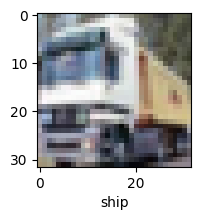

In [71]:
plot_sample(X_test , y_test , 1)

In [72]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[5.8651500e-04, 8.1540558e-05, 3.6900556e-03, 9.1436827e-01,
        7.5721781e-04, 5.3324506e-02, 2.8716335e-03, 2.5646682e-04,
        2.3771985e-02, 2.9178607e-04],
       [1.5180272e-03, 6.0537621e-02, 1.6613183e-06, 1.1354008e-06,
        6.8052657e-05, 2.0497080e-06, 3.0210077e-07, 2.5917197e-07,
        9.3782628e-01, 4.4630488e-05],
       [2.0902017e-02, 1.4860678e-01, 4.5895162e-03, 8.9913057e-03,
        6.8997068e-04, 4.7953308e-04, 4.2805888e-04, 1.1139334e-03,
        7.9407007e-01, 2.0128798e-02],
       [6.4519143e-01, 1.3993066e-03, 3.2027289e-01, 9.0612314e-04,
        2.2998121e-02, 4.4567182e-04, 2.6872696e-03, 3.1646900e-04,
        5.6914706e-03, 9.1121336e-05],
       [7.1204857e-07, 1.4611243e-05, 1.3104962e-02, 1.9763026e-02,
        7.4312639e-01, 1.4163980e-03, 2.2249231e-01, 2.2641550e-06,
        7.7886099e-05, 1.5326279e-06]], dtype=float32)

In [73]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:20]

[3, 8, 8, 0, 4, 6, 1, 6, 3, 1, 4, 9, 5, 7, 9, 6, 5, 7, 8, 6]

In [74]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

In [75]:
classes[y_classes[1]]

'ship'

In [76]:
print('Classification report: \n' , classification_report(y_test , y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.62      0.71      1000
           1       0.82      0.80      0.81      1000
           2       0.60      0.56      0.58      1000
           3       0.55      0.40      0.47      1000
           4       0.61      0.68      0.64      1000
           5       0.54      0.69      0.60      1000
           6       0.75      0.79      0.77      1000
           7       0.73      0.75      0.74      1000
           8       0.78      0.81      0.79      1000
           9       0.75      0.80      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [77]:
tf.saved_model.save(cnn , "saved_model_keras_dir")
converter = tf.lite.TFLiteConverter.from_keras_model(cnn)
tflite_model = converter.convert()

# Save the model.
with open('cnn.tflite', 'wb') as f:
  f.write(tflite_model)


In [78]:
import os

def recreate_labels():
  # 1) We use this in order to ignore any hidden files that might be here.
  # 'Datasets' is the name of the folder where we store our training data. The 'listdir' is used to fetch all the folder names.
  labels = [folder for folder in datasets.cifar10.load_data()]

  # 2) Then, we output the contents of each folder name to a file.
  with open('labels.txt', 'w') as file:
    for label in labels:
      file.write(str(label))
      file.write('\n')

recreate_labels()

#os.listdir('datasets') if not folder.startswith('.')